In [1]:
from quspin.operators import hamiltonian, exp_op  # Hamiltonians and operators
from quspin.basis import spinless_fermion_basis_1d  # Hilbert space fermion basis
from quspin.tools.block_tools import block_diag_hamiltonian  # block diagonalisation
import numpy as np  # generic math functions
import matplotlib.pyplot as plt  # plotting library

try:  # import python 3 zip function in python 2 and pass if already using python 3
    import itertools.izip as zip
except ImportError:
    pass

from quspin.basis import boson_basis_1d  # Hilbert space spin basis_1d

In [2]:
def n_expectation_per_site(N, Np, J, U, V, delta, sps):
    from quspin.operators import hamiltonian
    from quspin.basis import boson_basis_1d
    import numpy as np

    basis = boson_basis_1d(N, Nb=Np, sps=sps)

    # Liste di termini per l'Hamiltoniana
    hopping = [[-J + (-1)**i * delta, i, (i + 1) % N] for i in range(N-1)]
    int_bb = [[0.5 * U, j, j] for j in range(N)]
    int_b = [[-0.5 * U, j] for j in range(N)]

    static = [
        ["+-", hopping],
        ["-+", hopping],
        ["n", int_b],
        ["nn", int_bb],
    ]

    H = hamiltonian(static, [], basis=basis, dtype=np.float64)

    # Calcolo del ground state
    E0, psi0 = H.eigsh(k=1, which="SA")
    psi0 = psi0[:, 0]

    # Calcolo di ⟨n_i⟩ su ogni sito
    n_vals = np.array([
        np.vdot(psi0, hamiltonian([["n", [[1.0, i]]]], [], basis=basis).dot(psi0)).real
        for i in range(N)
    ])

    return n_vals

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
⟨n_i⟩ = [0.14315241 0.31146457 0.683307   0.84993287 1

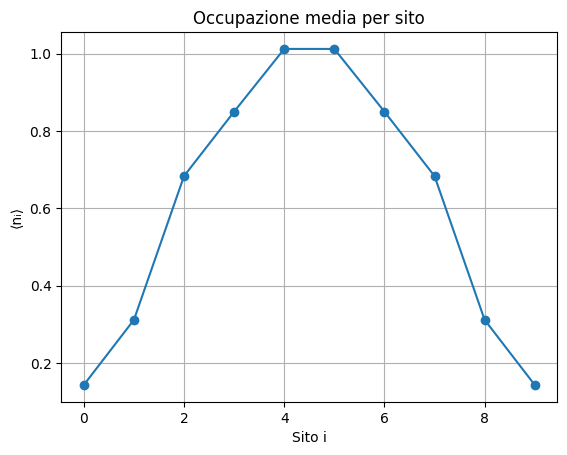

In [3]:
n_vals = n_expectation_per_site(N=10, Np=6, J=1, U=0, V=0, delta=-0.3, sps=5)
print("⟨n_i⟩ =", n_vals)

import matplotlib.pyplot as plt
plt.plot(range(len(n_vals)), n_vals, marker='o')
plt.xlabel("Sito i")
plt.ylabel("⟨nᵢ⟩")
plt.title("Occupazione media per sito")
plt.grid(True)
#plt.ylim([0,1])
plt.show()